Reference text
**bold**
*italics*

 bullets
 * point 1
 * point 2 
# Title

## Subtitle

### SubSubtitle

LaTeX equations
$ 1 + 1 = 2 $
$$ x + y = z $$

Markdown cheat sheet
https://guides.github.com/pdfs/markdown-cheatsheet-online.pdf

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt

# Create a daily clutter map

Daily clutter map(s) must be created FIRST before any RCA calculations may be made.

A daily clutter map is generated from a day's worth of radar files. You need only specify the directory of the radar files, the desired date (YYYYMMDD), the scan type (PPI or RHI), and if you're using horizontally or dual-polarized data. This is all done in the a handful of radar- and scan-specific JSON files, which should be modifed by the user for their specifications.

The current defaults in, for example, kaband_rhi.json are:

    "config": "kaband_rhi",
    "scan_type": "rhi",
    "polarization": "horizontal",
    "data_directory": "/home/alexishunzinger/data/proj-shared/data_transfer/cor/corkasacrcfrhsrhiM1.a1/",
    "file_extension": ".nc",
    "cluttermap_directory": "/home/alexishunzinger/projects/rca_aux/clutter_maps/",
    "cluttermap_date": "20181105",
    "baseline_directory": "/home/alexishunzinger/projects/rca_aux/baselines/",
    "baseline_date": "20181108",
    "daily_csv_dir": "/home/alexishunzinger/projects/rca_aux/dailies/",
    "site_abbrev": "cor",
    "instrument_abbrev": "kasacr",
    "range_limit": 10000,
    "z_threshold": 30

Call the clutter_map function from clutter_map.py. You will need to adjust the paramters in the clutter_maps.json configuration file before using the JSON file as input for the funtion.

You will need to import the following packages to use the clutter_map function:

In [2]:
import numpy as np
import pyart
import os
import glob
import json
from netCDF4 import Dataset
import sys

sys.path.append('/home/alexishunzinger/projects/github/rca/src/rca/')
from clutter_map import clutter_map

sys.path.append('/home/alexishunzinger/projects/github/rca/src/rca/modules/')
from create_clutter_flag import create_clutter_flag_ppi, create_clutter_flag_hsrhi
from file_to_radar_object import file_to_radar_object


# Replace the input with the JSON file named for the radar band and scan type
# band_scan.json
file = '/home/alexishunzinger/projects/github/rca/src/rca/kaband_rhi.json'
clutter_map(file)


## You are using the Python ARM Radar Toolkit (Py-ART), an open source
## library for working with weather radar data. Py-ART is partly
## supported by the U.S. Department of Energy as part of the Atmospheric
## Radiation Measurement (ARM) Climate Research Facility, an Office of
## Science user facility.
##
## If you use this software to prepare a publication, please cite:
##
##     JJ Helmus and SM Collis, JORS 2016, doi: 10.5334/jors.119



/home/jupyter/anaconda3/lib/python3.6/site-packages/pyart/graph/cm.py:104: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'red' in spec:
/home/jupyter/anaconda3/lib/python3.6/site-packages/pyart/graph/cm_colorblind.py:32: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'red' in spec:


ModuleNotFoundError: No module named 'create_clutter_flag'

Repeat this for all desired days you want to generate a daily clutter map. 

Save the output .nc file to a directory specifically for clutter maps (recommended). 

This directory will be used as the input for the next step, composite clutter map generation.

# Create a composite clutter map

A composite clutter map is composed of all specified daily clutter maps that must be previously generated. The composite clutter map identifies points where at least 80% of the daily clutter maps have identified as clutter points. This ensures the clutter signature is stable, especially in regions where the ground clutter varies or fluctuates day-to-day.

Use the composite_clutter_map function and a new netCDF is written with the composite clutter map in an array. The function takes the clutter_maps JSON file as input with current deafults the same as listed above.

The following new packages are required to run composite_clutter_map:

In [3]:
import sys
sys.path.append('/home/alexishunzinger/projects/github/rca/src/rca/modules/')

#from get_pct_on_clutter_map import get_pct_on_clutter_map_ppi
#from get_pct_on_clutter_map import get_pct_on_clutter_map_hsrhi
from composite_clutter_map import composite_clutter_map

file = '/home/alexishunzinger/projects/github/rca/src/rca/clutter_maps.json'
composite_clutter_map(file)

IndexError: list index out of range

## Plotting a clutter map
A simple plot may be generated using the plot_clutter_map function. This helps visualize where the clutter points calculated previously are located spatially and how many points did or did not make the threshold.

Specify either "day" or "composite" in the function input to represent the appropriate data.

### Daily clutter map

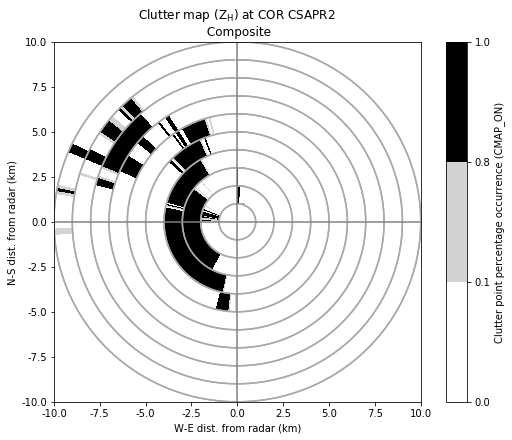

In [4]:
import matplotlib.pyplot as plt
from netCDF4 import Dataset
import sys

sys.path.append('/home/alexishunzinger/projects/github/rca/src/rca/modules/')
from plot_clutter_map import plot_clutter_map

clutter_map_netcdf = '/home/alexishunzinger/projects/taranis/taranis/calibration/datafiles/cluttermap_ppi_corcsapr2_composite.nc'
output_directory = '/home/alexishunzinger/projects/taranis/taranis/calibration/figures/'
scan_type = 'ppi'
map_type = 'composite'
polarization = 'horizontal'
max_range = 10
site = 'cor'
inst = 'csapr2'
location = 'CORCSAPR2'
plot_clutter_map(clutter_map_netcdf,output_directory,scan_type,map_type,polarization,max_range,site,inst,location)

### Composite clutter map

Change the inputs and use the same function to generate a composite clutter map. The color bar differs from the daily map, showing determined clutter points in black. These are the elements that are used to calculate clutter area reflectivity in the baseline and daily calculations.

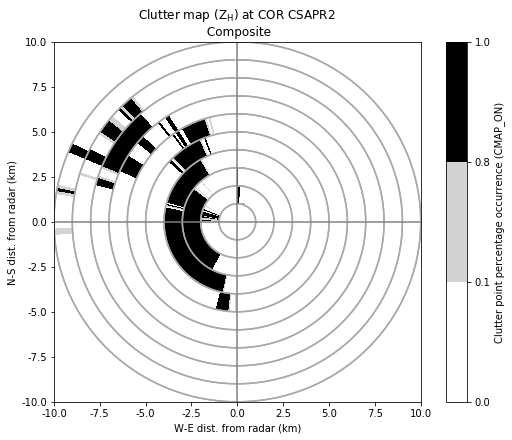

In [5]:
map_type = 'composite'
plot_clutter_map(clutter_map_netcdf,output_directory,scan_type,map_type,polarization,max_range,site,inst,location)

# Calculate the baseline value

The baseline is calculated using a day of radar files and (preferably) the composite clutter map.

Simply use the baseline function with relevant input (may use and adjust any of the radar_scan.json files).

In [6]:
import numpy as np
import os
import glob
import json
from netCDF4 import Dataset
import sys

sys.path.append('/home/alexishunzinger/projects/github/rca/src/rca/modules/')
from file_to_radar_object import file_to_radar_object
from calculate_dbz95 import calculate_dbz95_ppi, calculate_dbz95_hsrhi

sys.path.append('/home/alexishunzinger/projects/github/rca/src/rca/')
from baseline import baseline

radar_config_file = '/home/alexishunzinger/projects/github/rca/src/rca/xband_ppi.json'
dbz95_h = baseline(radar_config_file)
print('Baseline value: ', dbz95_h, 'dBZ')

Baseline value:  (nan, nan) dBZ


/home/jupyter/anaconda3/lib/python3.6/site-packages/numpy/lib/nanfunctions.py:1076: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


# Calculate the RCA value

The daily RCA value is calculated using a day of radar files, the composite clutter map, and the baseline value.

All of these are read in using the daily_rca function. Again, specify which radar_scan.json to use and adjust accordingly. This function may be looped over for all days of interest. Each day has a mean RCA calculated and written to a CSV file.

(It is recommended - and even necessary - to create the CSV file with appropriate headers before running the function. Daily CSV headers are: DATE, RCA_H, RCA_V, BASELINE)

In [7]:
import numpy as np
import os
import glob
import json
from netCDF4 import Dataset
import pandas as pd
import sys

sys.path.append('/home/alexishunzinger/projects/github/rca/src/rca/modules/')
from file_to_radar_object import file_to_radar_object
from calculate_dbz95 import calculate_dbz95_ppi, calculate_dbz95_hsrhi

sys.path.append('/home/alexishunzinger/projects/github/rca/src/rca/')
from daily_rca import daily_rca

radar_config_file = '/home/alexishunzinger/projects/github/rca/src/rca/xband_ppi.json'
daily_rca(radar_config_file,'20181109')

FileNotFoundError: [Errno 2] No such file or directory: b'/home/alexishunzinger/projects/rca_aux/baselines/baseline_ppi_ena_xsapr2_20181109.nc'

## Plot a timeseries of daily RCA values


In [1]:
import matplotlib.pyplot as plt
from netCDF4 import Dataset
import sys

sys.path.append('/home/alexishunzinger/projects/github/rca/src/rca/modules/')
from plot_rca_timeseries import plot_rca_timeseries_oneradar

rca_file = '/home/alexishunzinger/projects/taranis/taranis/calibration/datafiles/daily_rcavalues_ppi_enaxsapr2.csv'
output_directory = '/home/alexishunzinger/projects/rca_aux/figures/'
baseline_date = '2018-01-25'
polarization = 'dual'
scan_type = 'ppi'
site = 'cor'
inst = 'csapr2'
location = 'CORCSAPR2'

plot_rca_timeseries_oneradar(rca_file,output_directory,baseline_date,polarization,scan_type)

KeyError: 'family is not a valid rc parameter (see rcParams.keys() for a list of valid parameters)'